# Practical 12

implementation of any real timeapplication using suitable machine learning algorithem technique.

Topic:Movie Rating Predicton

Input:Dataset containing data like num_critic_for_reviews ,duration ,num_voted_users ,num_user_for_reviews ,movie_facbook_likes ,director_facebook_likes etc.

Output:Predict rating based on this input (X) dataset using RandomForestRegressor.

In [94]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog, messagebox
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict,Counter
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display
import warnings

In [95]:
warnings.filterwarnings('ignore')

In [96]:
df = pd.read_csv("movie_metadata.csv")

In [97]:
df.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1973,Color,Robert Redford,199.0,122.0,0.0,939.0,Tom Wilkinson,18000.0,11538204.0,Crime|Drama|History,...,135.0,English,USA,PG-13,25000000.0,2010.0,1000.0,7.0,2.35,0
503,Color,Luc Besson,101.0,94.0,0.0,14.0,Adam LeFevre,563.0,15131330.0,Adventure|Animation|Family|Fantasy,...,64.0,English,France,PG,86000000.0,2006.0,80.0,6.0,2.35,941
3831,Color,Nicolas Winding Refn,440.0,90.0,0.0,428.0,Kristin Scott Thomas,33000.0,778565.0,Crime|Drama,...,475.0,English,Denmark,R,4800000.0,2013.0,1000.0,5.7,1.85,30000
4043,Color,Joshua Marston,155.0,101.0,13.0,6.0,Wilson Guerrero,280.0,6517198.0,Crime|Drama,...,172.0,Spanish,Colombia,R,3000000.0,2004.0,11.0,7.5,1.85,0
1602,Color,Stephen Hillenburg,89.0,87.0,47.0,217.0,Bill Fagerbakke,19000.0,85416609.0,Adventure|Animation|Comedy|Family|Fantasy,...,186.0,English,USA,PG,30000000.0,2004.0,542.0,7.0,1.85,0


In [98]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [99]:
df.shape

(5043, 28)

In [100]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [101]:
df['gross'].fillna(df['gross'].median(),inplace=True)
df['budget'].fillna(df['budget'].median(),inplace=True)
df.dropna(inplace=True)

In [102]:
df.shape

(4411, 28)

## About the Data (EDA)

### Creating a new column to show main genre of movie. This will help in sorting out movies according to their genre types

In [103]:
df['main_genre'] = df['genres'].apply(lambda x: x.split('|')[0] if '|' in x else x) 

In [104]:
df.sample(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre
3244,Color,Michael Clancy,27.0,85.0,0.0,742.0,Rip Torn,11000.0,70527.0,Comedy|Drama,...,English,USA,R,6500000.0,2004.0,826.0,6.7,1.85,376,Comedy
299,Color,Simon West,383.0,103.0,165.0,13000.0,Sylvester Stallone,26000.0,85017401.0,Action|Adventure|Thriller,...,English,USA,R,92000000.0,2012.0,13000.0,6.7,2.35,108000,Action


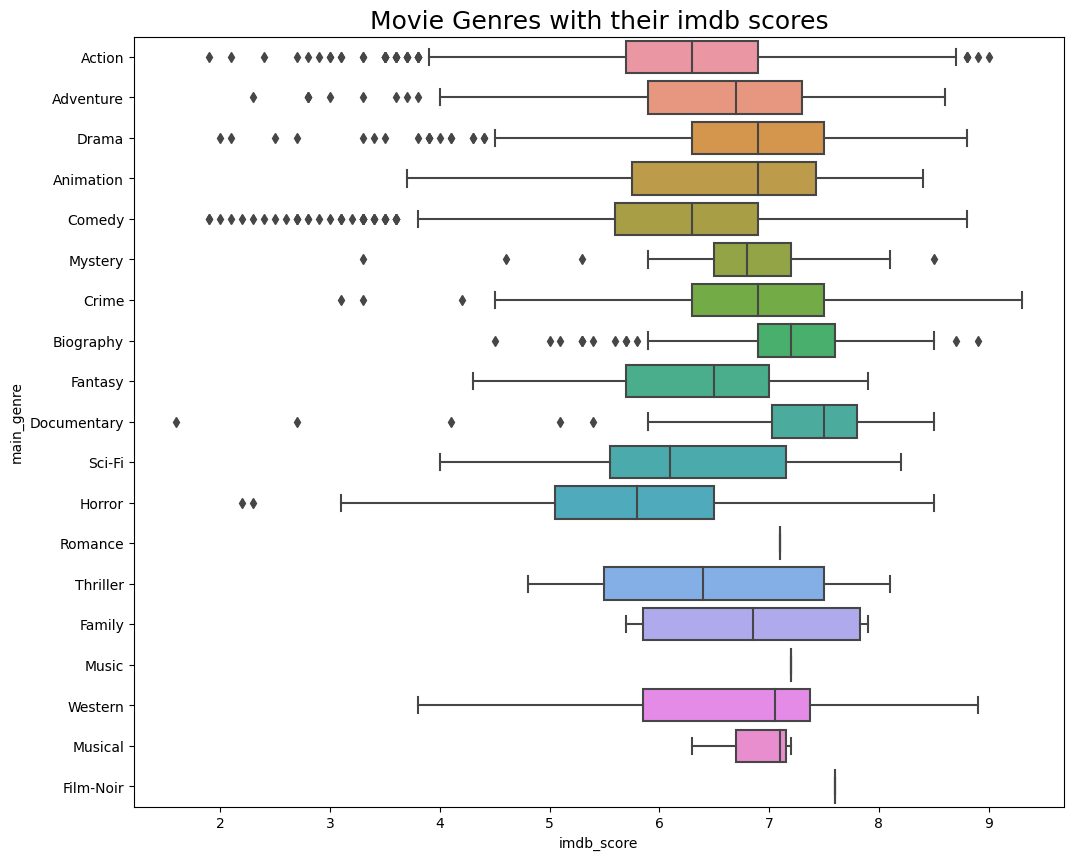

In [105]:
plt.figure(figsize=(12,10))
sns.boxplot(x='imdb_score',y='main_genre',data=df)
plt.title('Movie Genres with their imdb scores',fontsize=18)
plt.show()

In [106]:
numeric_cols = df.select_dtypes(include=np.number).columns
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]

In [107]:
df.shape

(3632, 29)

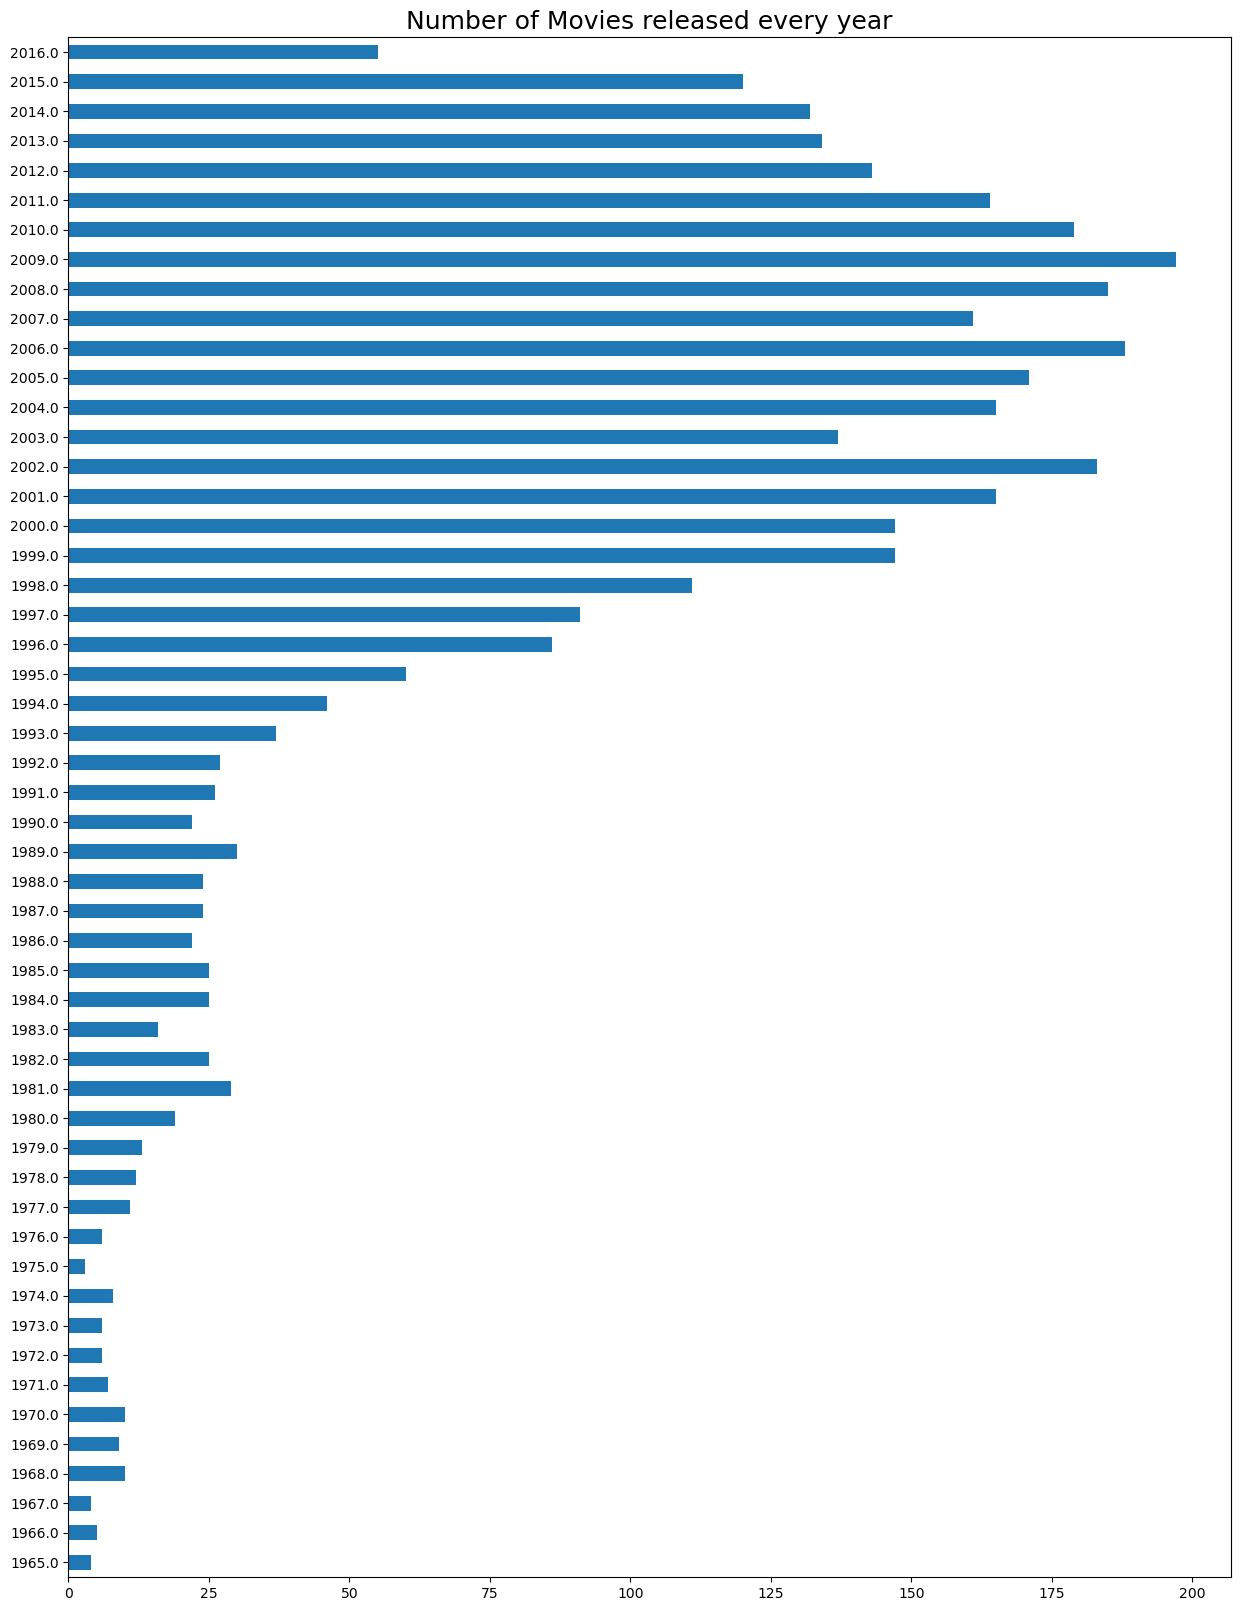

In [108]:
df.title_year.value_counts(dropna=True).sort_index().plot(kind='barh',figsize=(15,20))
plt.title("Number of Movies released every year",fontsize=18)
plt.show()

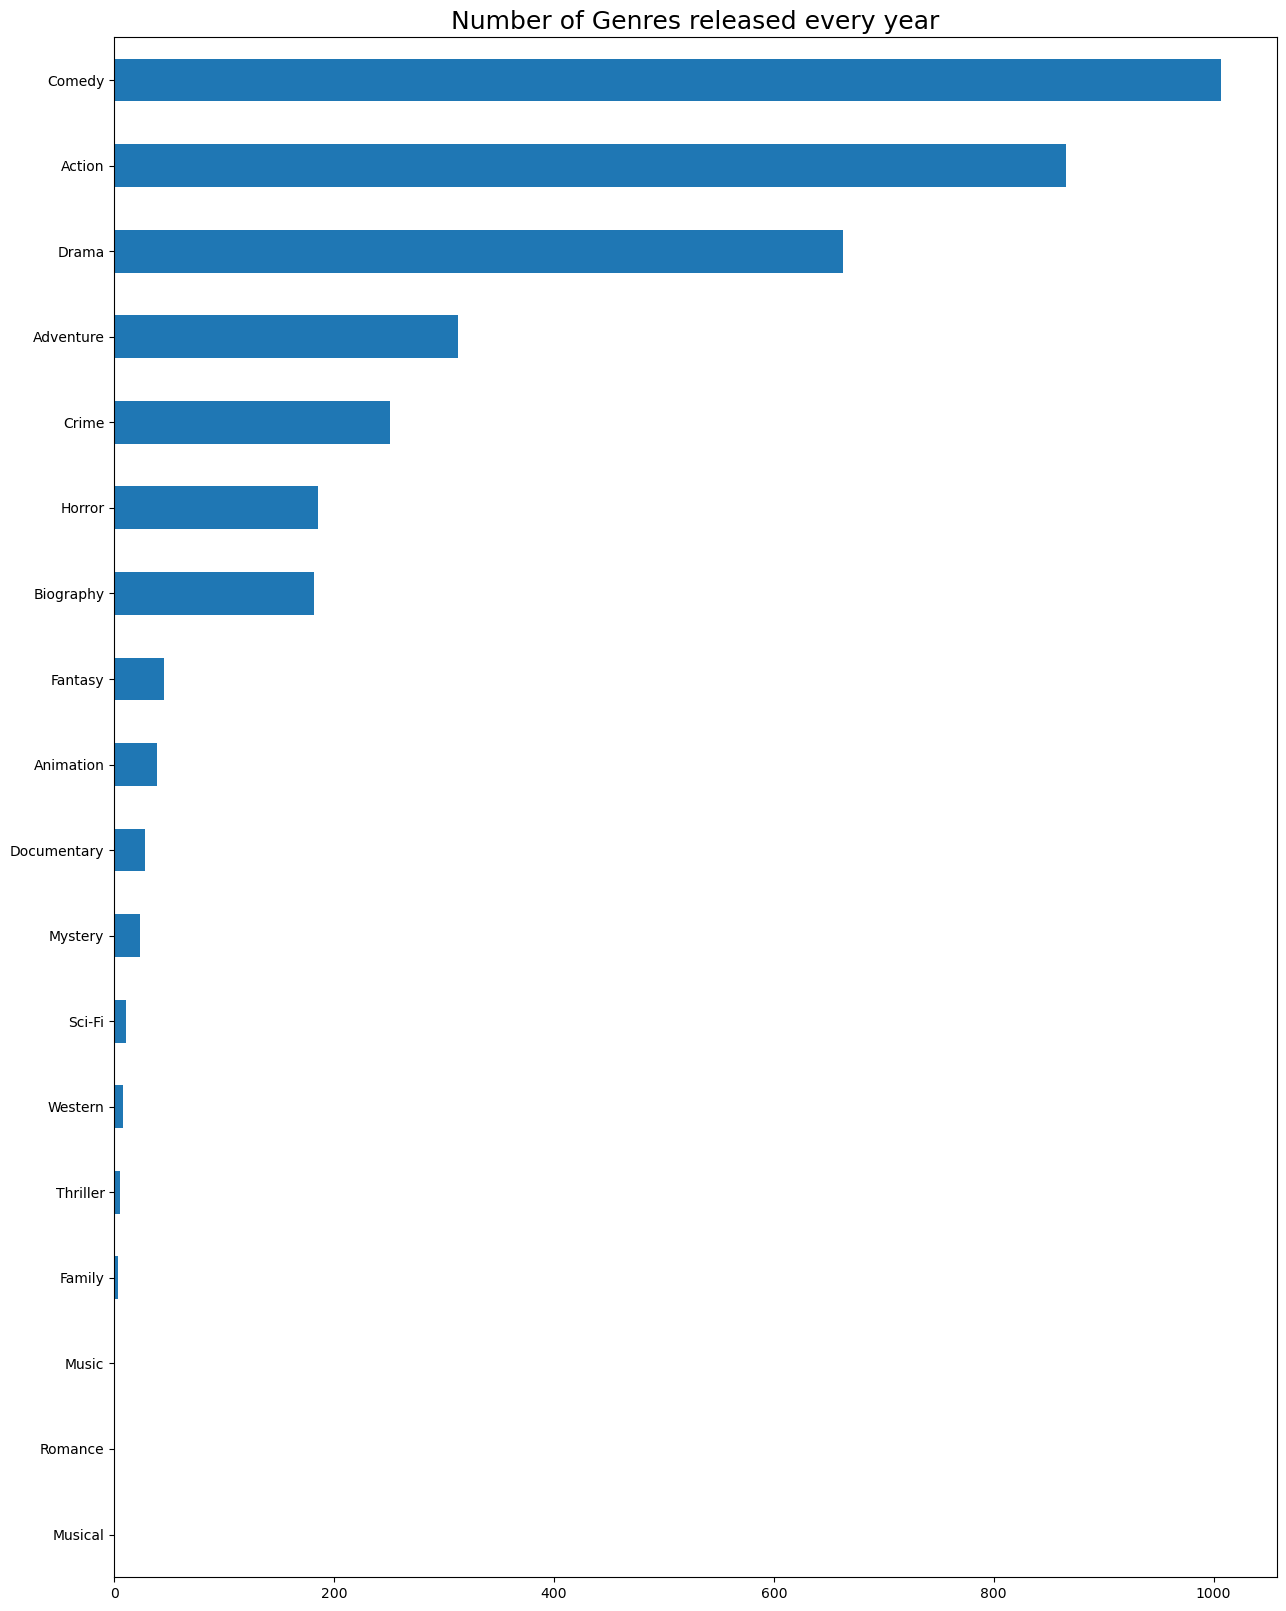

In [109]:
df.main_genre.value_counts(dropna=True).sort_values().plot(kind='barh',figsize=(15,20))
plt.title("Number of Genres released every year",fontsize=18)
plt.show()

In [110]:
# Movies with the lowest Imdb rating 
df[df['imdb_score']==3.3]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre
313,Color,Pitof,212.0,87.0,26.0,566.0,Christopher Heyerdahl,827.0,40198710.0,Action|Crime|Fantasy|Romance|Thriller,...,English,USA,PG-13,100000000.0,2004.0,825.0,3.3,2.35,0,Action
1303,Color,William Malone,104.0,101.0,37.0,595.0,Jeffrey Combs,2000.0,13208023.0,Crime|Horror|Thriller,...,English,UK,R,42000000.0,2002.0,886.0,3.3,2.35,612,Crime
1934,Color,Bob Spiers,33.0,93.0,14.0,199.0,Richard Briers,1000.0,29247405.0,Comedy|Family|Music,...,English,UK,PG,25000000.0,1997.0,401.0,3.3,1.85,0,Comedy
2519,Color,Ian Iqbal Rashid,62.0,94.0,8.0,66.0,Clé Bennett,328.0,7070459.0,Drama,...,English,Canada,PG-13,20000000.0,2007.0,122.0,3.3,1.85,238,Drama
2550,Color,Perry Andelin Blake,56.0,80.0,11.0,499.0,Kenan Thompson,911.0,40363530.0,Comedy|Family,...,English,USA,PG,16000000.0,2002.0,521.0,3.3,1.85,1000,Comedy
2935,Color,Tamra Davis,111.0,93.0,33.0,135.0,Katherine Boecher,1000.0,37188667.0,Comedy|Drama,...,English,USA,PG-13,12000000.0,2002.0,188.0,3.3,1.85,0,Comedy
3197,Color,Tom Brady,49.0,97.0,105.0,269.0,Kevin Nealon,982.0,2331318.0,Comedy,...,English,USA,R,10000000.0,2011.0,503.0,3.3,1.85,0,Comedy
3230,Color,Alan Metter,17.0,83.0,3.0,421.0,Michael Winslow,16000.0,126247.0,Comedy|Crime,...,English,USA,PG,6200000.0,1994.0,542.0,3.3,1.85,321,Comedy
3799,Color,Klaus Menzel,13.0,103.0,34.0,227.0,Jacqueline Bisset,811.0,16066.0,Mystery|Romance|Thriller,...,English,Germany,R,5000000.0,2004.0,522.0,3.3,2.35,40,Mystery
4019,Color,Uwe Boll,17.0,86.0,892.0,50.0,Shelly Varod,603.0,25517500.0,Action|Adventure|Fantasy|Thriller,...,English,Canada,R,3500000.0,2014.0,145.0,3.3,1.78,721,Action


In [111]:
# Movie with the highest Imdb rating
df[df['imdb_score']==8.9]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre
4498,Color,Sergio Leone,181.0,142.0,0.0,24.0,Luigi Pistilli,16000.0,6100000.0,Western,...,Italian,Italy,Approved,1200000.0,1966.0,34.0,8.9,2.35,20000,Western


## Histogram of all columns in df

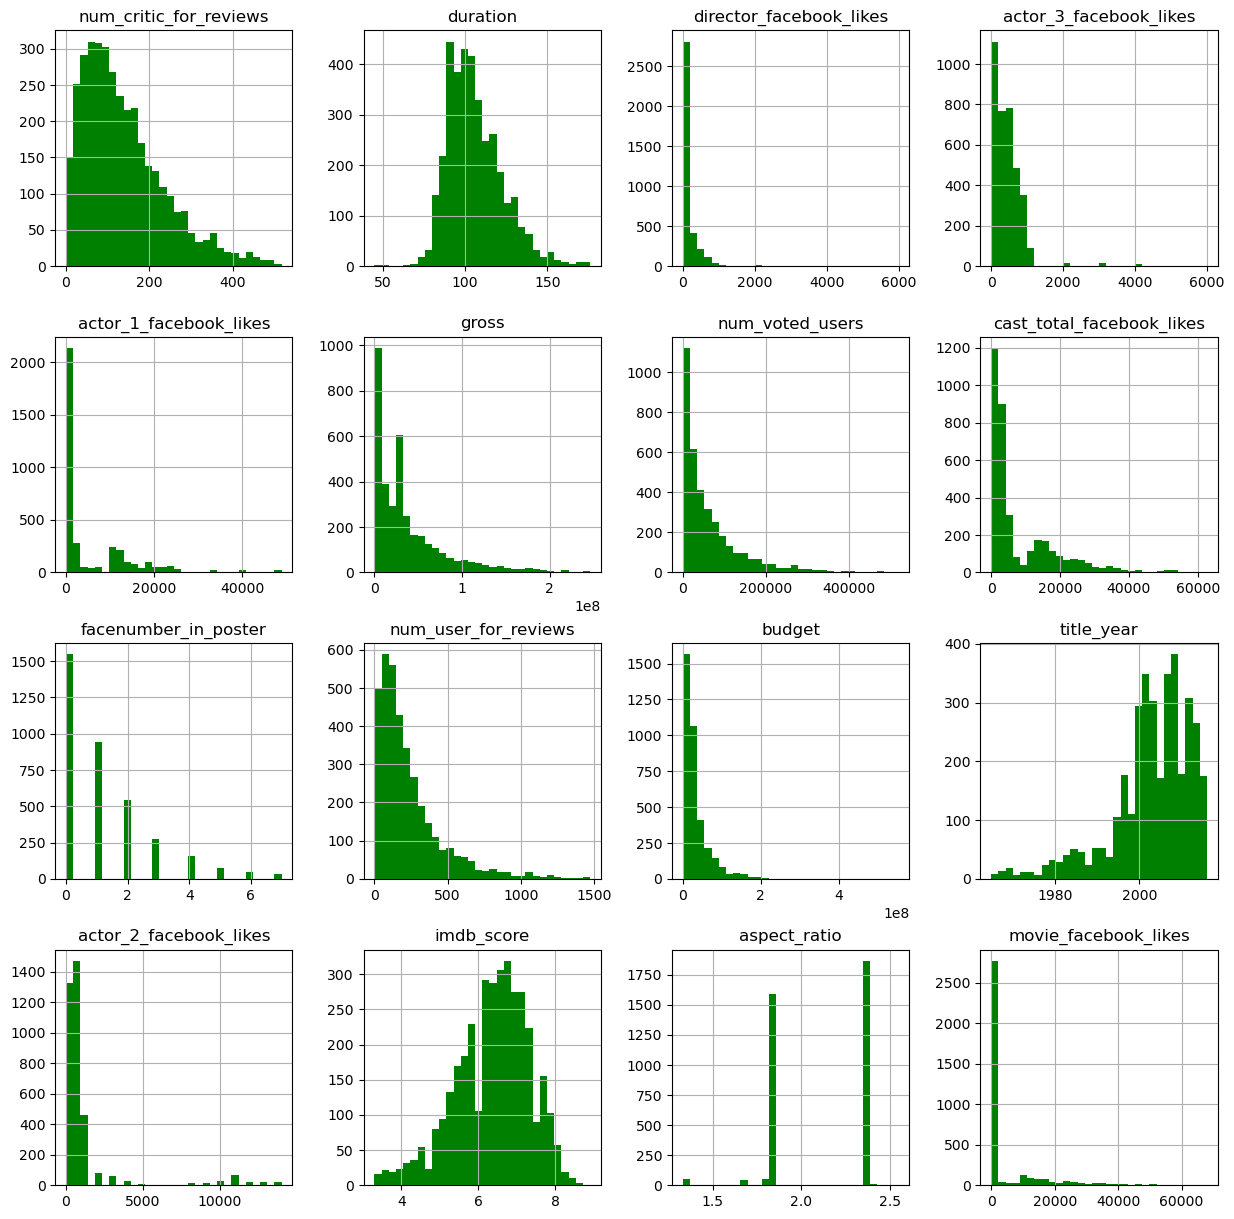

In [112]:
df.hist(bins=30,figsize=(15,15),color='g')
plt.show()

## Adding New Column that shows number of genres in movie

In [113]:
df['num_genres'] = df.genres.apply(lambda x: len(x.split('|')))

In [114]:
df.sample(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre,num_genres
717,Color,Martin Campbell,137.0,130.0,258.0,345.0,Joe Don Baker,394.0,106635996.0,Action|Adventure|Thriller,...,UK,PG-13,58000000.0,1995.0,387.0,7.2,2.35,0,Action,3
1765,Color,John Glen,112.0,127.0,46.0,244.0,Topol,844.0,62300000.0,Action|Adventure|Thriller,...,UK,PG,28000000.0,1981.0,402.0,6.8,2.35,2000,Action,3


In [115]:
df.num_genres.max()

8

In [116]:
df[df.num_genres==8]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre,num_genres
902,Color,Don Bluth,78.0,94.0,383.0,753.0,Kelsey Grammer,4000.0,58297830.0,Adventure|Animation|Drama|Family|Fantasy|Music...,...,USA,G,50000000.0,1997.0,808.0,7.1,2.35,0,Adventure,8
1387,Color,John Frankenheimer,126.0,124.0,287.0,475.0,James Frain,9000.0,23360779.0,Action|Adventure|Crime|Drama|Family|Fantasy|Ro...,...,USA,R,34000000.0,2000.0,1000.0,5.7,2.35,852,Action,8
2340,Color,Kevin Munroe,138.0,107.0,14.0,311.0,Laura Spencer,403.0,1183354.0,Action|Comedy|Crime|Fantasy|Horror|Mystery|Sci...,...,USA,PG-13,20000000.0,2010.0,368.0,5.1,2.35,0,Action,8


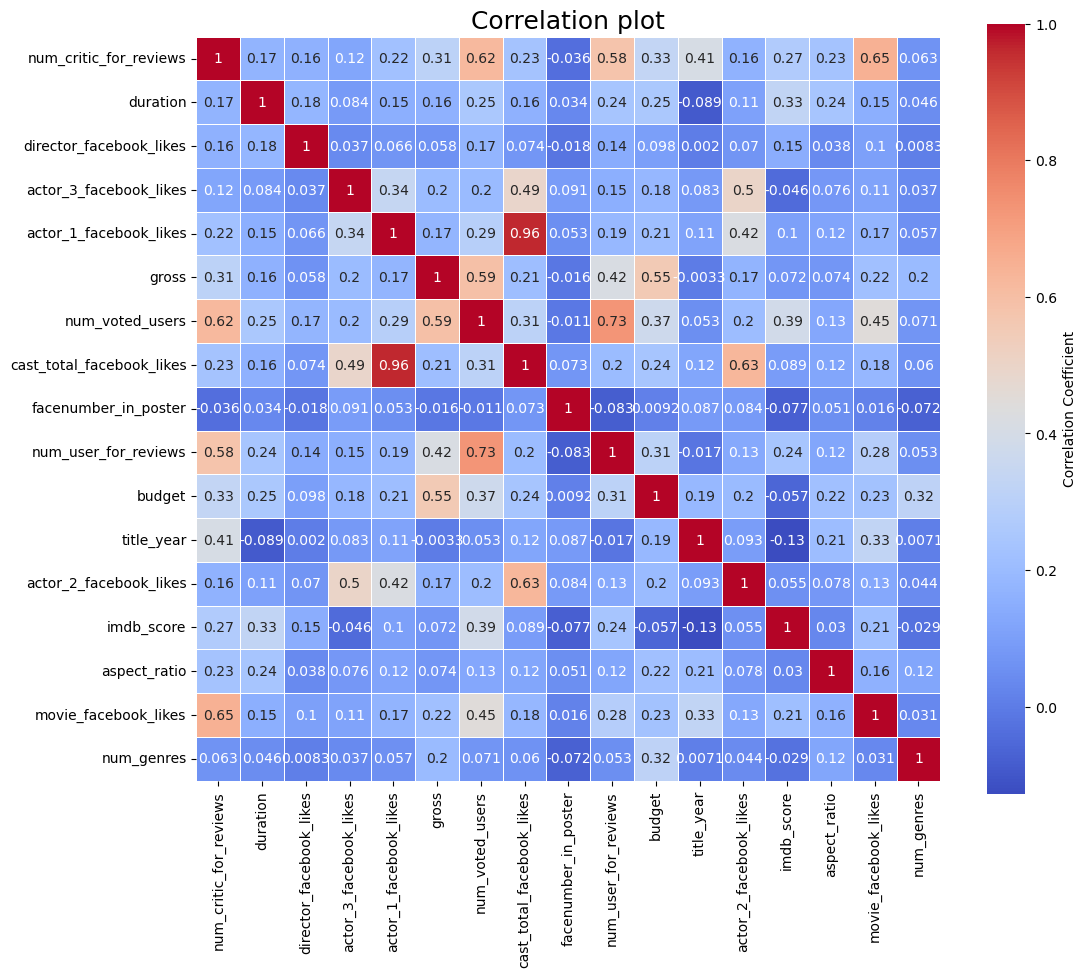

In [117]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidths=.5,
            cmap='coolwarm',square=True,cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation plot",fontsize=18)
plt.show()

### Selected Cols for model
num_critic_for_reviews<br>
duration<br>
num_voted_users<br>
num_user_for_reviews<br>
movie_facbook_likes<br>
director_facebook_likes<br>

In [130]:
X = df[['num_critic_for_reviews','duration','num_voted_users','num_user_for_reviews','movie_facebook_likes','director_facebook_likes']]
y_rating = df['imdb_score']


In [131]:
X.shape,y_rating.shape

((3632, 6), (3632,))

# Train_test

In [141]:
X_train, X_test, y_train_rating, y_test_rating = tts(X, y_rating, test_size=0.2, random_state=32)


In [142]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [143]:
critic_reviews = widgets.FloatText(description="Critic Reviews:")
duration = widgets.FloatText(description="Duration (minutes):")
voted_users = widgets.FloatText(description="Voted Users:")
user_reviews = widgets.FloatText(description="User Reviews:")
movie_likes = widgets.FloatText(description="Movie Likes:")
director_likes = widgets.FloatText(description="Director Likes:")

In [144]:
display(critic_reviews, duration, voted_users, user_reviews, movie_likes, director_likes)

FloatText(value=0.0, description='Critic Reviews:')

FloatText(value=0.0, description='Duration (minutes):')

FloatText(value=0.0, description='Voted Users:')

FloatText(value=0.0, description='User Reviews:')

FloatText(value=0.0, description='Movie Likes:')

FloatText(value=0.0, description='Director Likes:')

# Train the Model

In [145]:
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train_scaled, y_train_rating)
pred_imdb_score_knn = knn.predict([[critic_reviews.value, duration.value, voted_users.value, user_reviews.value, movie_likes.value, director_likes.value]])
print("Predicted IMDb score (KNN):", pred_imdb_score_knn[0])

Predicted IMDb score (KNN): 6.133333333333334


In [136]:
knn_accuracy = knn.score(X_test_scaled, y_test_rating)
print("Accuracy of KNN regressor:", knn_accuracy)


Accuracy of KNN regressor: 0.21483081676477445


In [137]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train_rating)
pred_imdb_score_rf = rf_regressor.predict([[critic_reviews.value, duration.value, voted_users.value, user_reviews.value, movie_likes.value, director_likes.value]])
print("Predicted IMDb score (Random Forest):", pred_imdb_score_rf[0])


Predicted IMDb score (Random Forest): 6.505999999999999


In [138]:
mse_rf = mean_squared_error(y_test_rating, rf_regressor.predict(X_test_scaled))
print("Mean Squared Error of RandomForestRegressor:", mse_rf)


Mean Squared Error of RandomForestRegressor: 0.6346543865199454


In [139]:
lr_regressor = LinearRegression()
lr_regressor.fit(X_train_scaled, y_train_rating)
pred_imdb_score_lr = lr_regressor.predict([[critic_reviews.value, duration.value, voted_users.value, user_reviews.value, movie_likes.value, director_likes.value]])
print("Predicted IMDb score (Linear Regression):", pred_imdb_score_lr[0])

Predicted IMDb score (Linear Regression): 6.35645438898451


In [140]:
lr_accuracy = lr_regressor.score(X_test_scaled, y_test_rating)
print("Accuracy of Linear Regression:", lr_accuracy)

Accuracy of Linear Regression: 0.23621109523864936
